In [239]:
import numpy as np
from sklearn.linear_model import LinearRegression 
import pandas as pd 
import matplotlib.pyplot as plt 

# 1. Gradient descent in one dimension

In [240]:
def one_dimensional_loss(x): #The loss function from the slides
    return (x**2)/4 -2*x + 5

In [241]:
def one_dimensional_loss_gradient(x): #The gradient
    return x/2 - 2 

In [242]:
x_init = np.random.uniform(-10, 10) #The initial value for x
print(x_init)

5.443416438590244


In [243]:
learning_rate = 0.1 #change this to see what happens
num_iters = 200

In [244]:
x = x_init 
costs = []
for _ in range(num_iters):
    cost = one_dimensional_loss(x)
    costs.append(cost)
    dcost_dx = one_dimensional_loss_gradient(x)
    x = x - learning_rate*dcost_dx

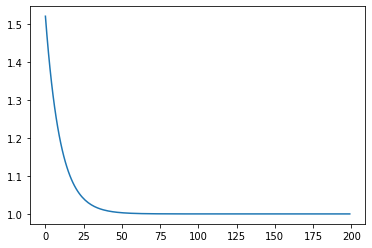

In [245]:
plt.plot(costs) 

In [246]:
print(x)

4.00005059559468


# 2. Gradient descent in two dimensions

In [247]:
def two_dimensional_loss(x, y): #Again, from the slides
    return x**4 + x**3 -2*x**2 + y**2 

In [248]:
def two_dimensional_loss_gradient(x, y):
    return (4*x**3 + 3*x**2 -4*x , 2*y)

In [249]:
x_init, y_init = -0.5, 4.5 

In [250]:
learning_rate = 0.1
num_iters = 200 

In [251]:
x, y = x_init, y_init 
costs = []
for _ in range(num_iters):
    cost = two_dimensional_loss(x, y)
    costs.append(cost)
    dx, dy = two_dimensional_loss_gradient(x, y)
    x = x - learning_rate*dx 
    y = y - learning_rate*dy

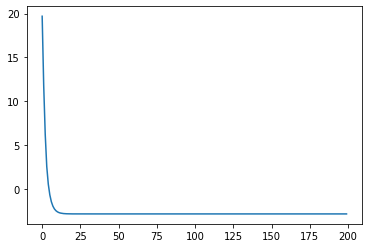

In [252]:
plt.plot(costs)

In [253]:
(x, y)

(-1.4430004681646915, 1.8672820059964457e-19)

# 3. Linear regression in one dimension (three ways)

## 3.1. Getting the data

In [254]:
import numpy as np
from sklearn.linear_model import LinearRegression 
import pandas as pd 
import matplotlib.pyplot as plt 

Here, I wish to show that linear regression can "discover" the true value of m and b for any data of the form y = m*x + b . Therefore, see how the results change when varying: 

1. m <-- Slope 
2. b <-- x-Intercept
3. x_min and x_max <-- Minimum and maximum of x in the dataset
4. n_points <-- Number of datapoints 
5. noise_coeff <-- Amount of noise

In [255]:
m = 3.14
b = 11.2358
x_min, x_max = -10, 10
n_points = 100
noise_coeff = 10


In [256]:
X = np.linspace(x_min, x_max, num=n_points)

In [257]:
Y = m*X + b + noise_coeff*np.random.normal(size=n_points)

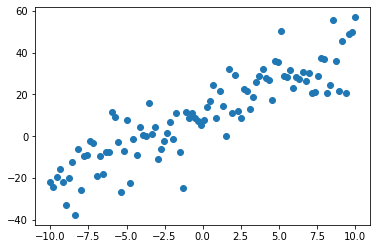

In [258]:
plt.scatter(X, Y)

## 3.2. Closed-form solution

In [259]:
X_dummied = np.zeros((n_points, 2))
X_dummied[:,1] = 1
X_dummied[:,0] = X 

In [260]:
m_disc, b_disc = np.linalg.inv(X_dummied.T@X_dummied)@(X_dummied.T@Y)

In [261]:
m_disc, b_disc

(3.173791342720213, 10.14489361733451)

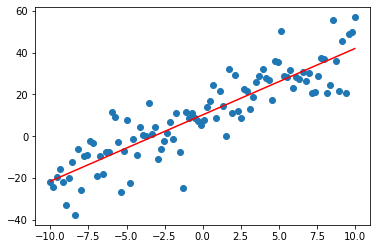

In [262]:
Yhat = m_disc*X + b_disc
plt.scatter(X, Y)
plt.plot(X, Yhat, color="red")
plt.show()

## 3.3. Gradient descent solution

In [263]:
learning_rate = 0.001 
n_iters = 2000

In [264]:
m_disc, b_disc = np.random.uniform(low=-20, high=20, size=2)
costs = []
for _ in range(n_iters):
    yhat = m_disc*X + b_disc
    cost = np.mean((Y - yhat)**2)
    costs.append(cost)
    dm = (1/n_points)*(-2*Y.T@X +2*m_disc*X.T@X +2*b_disc*np.sum(X))
    db = (1/n_points)*(-2*np.sum(Y)+2*m_disc*np.sum(X) +2*n_points*b_disc )
    m_disc = m_disc - learning_rate*dm 
    b_disc = b_disc - learning_rate*db



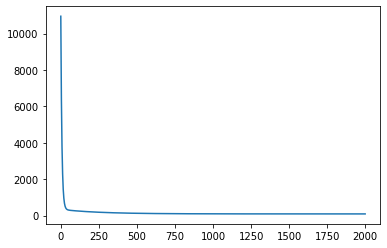

In [265]:
plt.plot(costs)

In [266]:
m_disc

3.1737913427202087

In [267]:
b_disc

9.856404036685138

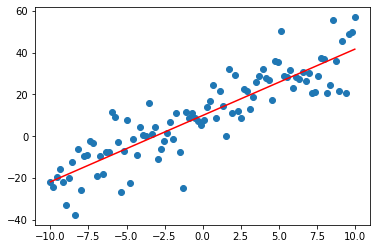

In [268]:
Yhat = m_disc*X + b_disc
plt.scatter(X, Y)
plt.plot(X, Yhat, color="red")
plt.show()

## 3.4. Scikit-Learn solution (Closed-Form)

In [269]:
lr_model = LinearRegression()

In [270]:
lr_model.fit(X.reshape(-1, 1), Y)

LinearRegression()

In [271]:
lr_model.coef_, lr_model.intercept_

(array([3.17379134]), 10.144893617334512)

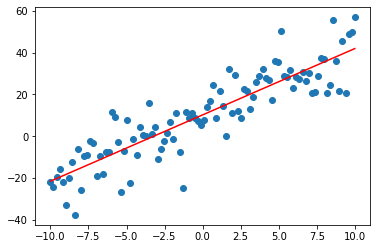

In [272]:
Yhat = lr_model.predict(X.reshape(-1, 1))
plt.scatter(X, Y)
plt.plot(X, Yhat, color="red")
plt.show()

# Activity: 

Collect the heights and weights of the members (in the tutorial session, not as HW!) and run a linear regression model (Numpy gradient descent + SKLearn) on the same. The students should give the steps for the same.

# Homework:

Collect a dataset by yourself by conducting a survey of some sort among the IIITB student community. Perform linear regression and explain the results.